In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Course Material/Supervised Machine Learning/KNN

/content/drive/MyDrive/Course Material/Supervised Machine Learning/KNN


# Importing dataset

In [ ]:
train = pd.read_csv('titanic_train.csv')
train.shape

(891, 12)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Embarked implies where the traveler mounted from. There are three possible values for Embark
### Southampton, Cherbourg, and Queenstown.

### SibSp is the number of siblings or spouse of a person onboard

###  Parch is the feature contained the number of parents or children each passenger was touring with.

# Check the Number of passengers died.

In [ ]:
train['Survived'].value_counts()  # 0 = died, 1 = lived  since 60% of passengers died

0    549
1    342
Name: Survived, dtype: int64

# Droping Irrelevant Features

In [ ]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace = True) # Removing coz of no importance
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Checking For Null Values

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Replacing Null Values in "Age" with mean value of "Age"

In [ ]:
train.fillna(value = { "Age" : train['Age'].mean()}, inplace = True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

# Drop all the rows containing Null Values

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Creating Dummy Variables and dropping first column to avoid multicollinearity

In [ ]:
Sex = pd.get_dummies(train['Sex'],drop_first = True)
Embark = pd.get_dummies(train['Embarked'],drop_first = True)

# Adding dummy variables to original data

In [ ]:
train = pd.concat([train, Sex, Embark], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


# Removing Sex and Embarked because their dummy variables are created

In [ ]:
train.drop(['Sex', 'Embarked'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Extracting features and labels

In [ ]:
X = train.drop(['Survived'], axis = 1).values

In [ ]:
y = train['Survived'].values

# Performing a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_test.shape

(178, 8)

# Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Finding Optimal value of K

In [ ]:
Error_Rate = []

for i in range(1,50):

    knn_opt = KNeighborsClassifier(n_neighbors = i)
    knn_opt.fit(X_train_scaled,y_train)
    y_pred_opt = knn_opt.predict(X_test_scaled)
    Accuracy = np.mean(y_pred_opt == y_test)
    error_rate_value = 1 - Accuracy
    Error_Rate.append(error_rate_value)

Text(0, 0.5, 'Error Rate')

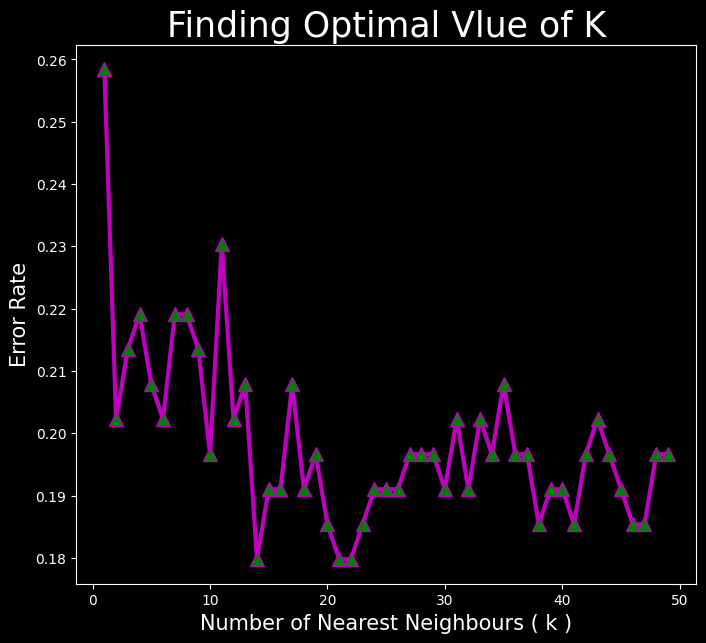

In [ ]:
plt.figure(figsize=(8,7))
plt.plot(range(1, 50), Error_Rate, 'm', lw = 3,  marker ='^', markerfacecolor ='g', markersize = 10)
plt.title('Finding Optimal Vlue of K', fontsize = 25)
plt.xlabel('Number of Nearest Neighbours ( k )', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# Applying KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 14)


knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)

# Calculating Accuracy

In [ ]:
Accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 82.02


# Creating Confusion Matrix

In [ ]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

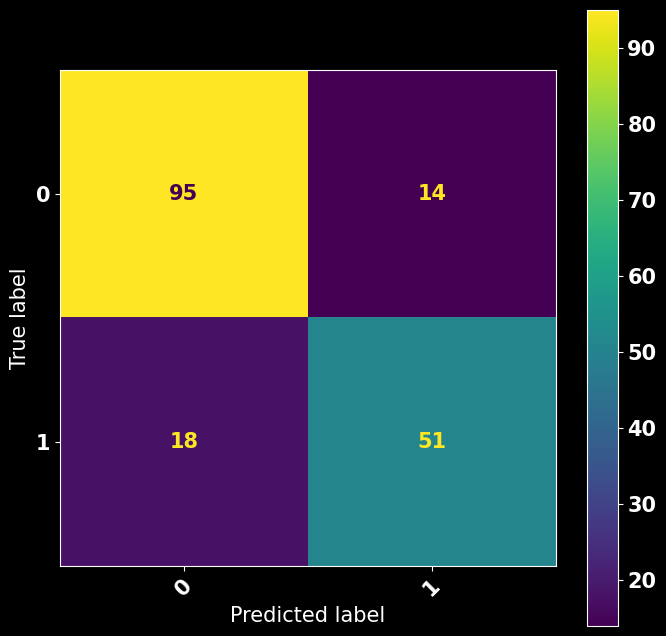

In [ ]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

# Calculating Accuracy, Precision, Recall and F1-Score

In [ ]:
Accuracy = accuracy_score(y_test, y_pred, normalize=True).round(3)
Precision = precision_score(y_test, y_pred, average = 'macro').round(3)   # macro calculate the average value of classes.
Recall = recall_score(y_test, y_pred, average = 'macro').round(3)
F1_Score = f1_score(y_test, y_pred, average = 'macro').round(3)

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")


Accuracy :  0.82
 
Precision :  0.813
 
Recall :  0.805
 
F1_Score :  0.809
 
